In [16]:
# Load all the libraries necessary for the project 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.offline as offline
#offline.init_notebook_mode()
#import plotly.tools as tls
color = sns.color_palette()
from sklearn import preprocessing, model_selection, metrics
#import lightgbm as lgb

# Avito data files are available in the "C:\akmisra\courses\MachineLearning\avito-data" directory.
import os
print(os.listdir("C:\\akmisra\\courses\\MachineLearning\\avito-data"))

# Results are saved as output.

['periods_test.csv', 'periods_train.csv', 'test.csv', 'test_active.csv', 'train.csv', 'train_active.csv']


In [17]:
# Read the necessary data
print('Reading Data ...')
train = pd.read_csv("C:\\akmisra\\courses\\MachineLearning\\avito-data\\train.csv", parse_dates=["activation_date"])
print('training data size: ', train.shape)
test = pd.read_csv("C:\\akmisra\\courses\\MachineLearning\\avito-data\\test.csv", parse_dates=["activation_date"])
print('test data size: ', test.shape)
periods_train = pd.read_csv("C:\\akmisra\\courses\\MachineLearning\\avito-data\\periods_train.csv", parse_dates=["activation_date", "date_from", "date_to"])
print('periods_train data size: ', periods_train.shape)
periods_test = pd.read_csv("C:\\akmisra\\courses\\MachineLearning\\avito-data\\periods_test.csv", parse_dates=["activation_date", "date_from", "date_to"])
print('periods_test data size: ', periods_test.shape)
print('Finished Reading Data ...')

Reading Data ...
periods_train data size:  (16687412, 4)
periods_test data size:  (13724922, 4)
training data size:  (1503424, 18)
test data size:  (508438, 17)
Finished Reading Data ...


In [18]:
# Check the data in train dataset
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [19]:
# test dataset should not have deal probability column
test.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,70,2017-04-17,Private,NaN,NaN
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.0


In [20]:
# Also check periods_train dataset
periods_train.head()

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28


In [21]:
# Training dataset overview
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null datetime64[ns]
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: datetim

In [22]:
train.describe()

,price,item_seq_number,image_top_1,deal_probability
count,1.418062e+06,1.503424e+06,1.390836e+06,1.503424e+06
mean,3.167081e+05,7.436740e+02,1.241932e+03,1.391306e-01
std,6.689154e+07,5.572522e+03,9.704641e+02,2.600785e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+02,9.000000e+00,4.250000e+02,0.000000e+00
50%,1.300000e+03,2.900000e+01,1.057000e+03,0.000000e+00
75%,7.000000e+03,8.800000e+01,2.217000e+03,1.508700e-01
max,7.950101e+10,2.044290e+05,3.066000e+03,1.000000e+00


In [26]:
# Use df.isnull.sum() to get the count of missing values in each column of df.
# Use df.isnull.count() to get the count of rows for each column in df 
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
missing_train_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_train_data.head(10)

,Total,Percent
param_3,862565,57.373369
param_2,654542,43.536753
description,116276,7.734079
image,112588,7.488772
image_top_1,112588,7.488772
price,85362,5.677839
param_1,61576,4.095718
category_name,0,0.000000
user_id,0,0.000000
region,0,0.000000


In [27]:
# Also check if we have missing values in Periods_train dataset
total = periods_train.isnull().sum().sort_values(ascending=False)
percent = (periods_train.isnull().sum()/periods_train.isnull().count()*100).sort_values(ascending=False)
missing_train_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_train_data.head()

,Total,Percent
activation_date,5790,0.034697
date_to,0,0.000000
date_from,0,0.000000
item_id,0,0.000000


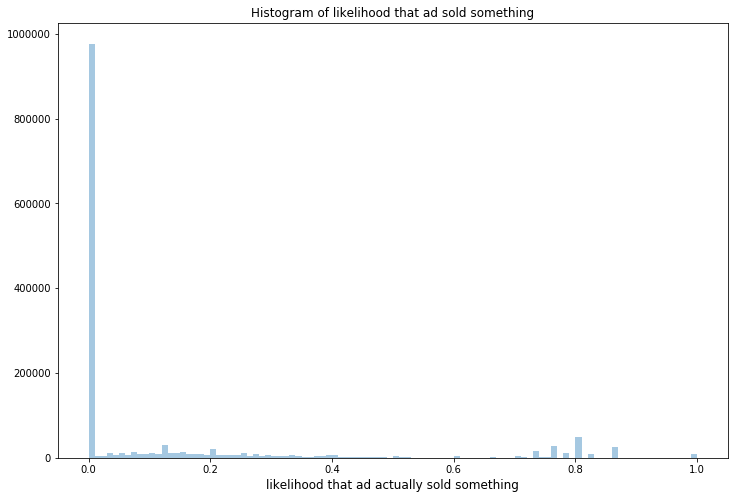

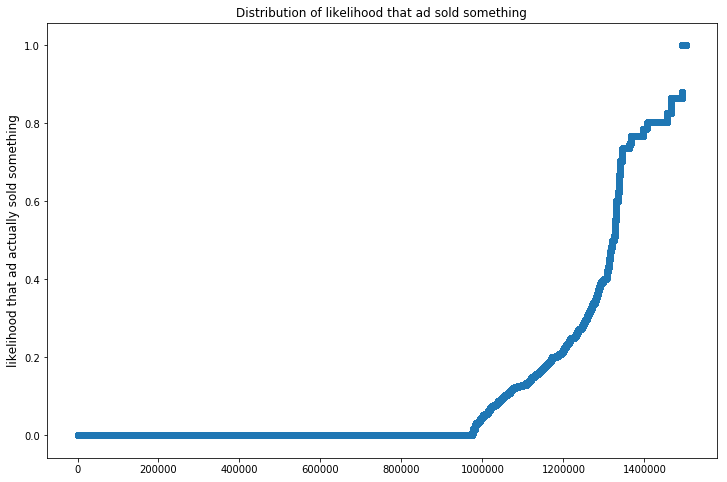

In [23]:
# data exploration - let us explore some of the data in the dataset
# deal probability is our target variable with float value between 0 and 1
# histogram and distribution of deal_probability
plt.figure(figsize = (12, 8))
sns.distplot(train['deal_probability'], bins=100, kde=False)
plt.xlabel('likelihood that ad actually sold something', fontsize=12)
plt.title('Histogram of likelihood that ad sold something')
plt.show()

plt.figure(figsize = (12, 8))
plt.scatter(range(train.shape[0]), np.sort(train.deal_probability.values))
plt.ylabel('likelihood that ad actually sold something', fontsize=12)
plt.title('Distribution of likelihood that ad sold something')
plt.show()

The plots show that almost 1000000 ads had a probability of 0 (means sold nothing), while few had a probability of 1, and the rest were in the middle.

In [ ]:
train['deal_class'] = train['deal_probability'].apply(lambda x: ">=0.5" if x >= 0.5 else "<0.5")
temp = train['deal_class'].value_counts()
labels = temp.index
sizes = (temp / temp.sum()) * 100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Distribution of deal class')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

del train['deal_class']

In [ ]:
# convert the Russian columns into English using Yandex Translator
from io import StringIO
temp_data = StringIO("""
region,region_en
Свердловская область, Sverdlovsk oblast
Самарская область, Samara oblast
Ростовская область, Rostov oblast
Татарстан, Tatarstan
Волгоградская область, Volgograd oblast
Нижегородская область, Nizhny Novgorod oblast
Пермский край, Perm Krai
Оренбургская область, Orenburg oblast
Ханты-Мансийский АО, Khanty-Mansi Autonomous Okrug
Тюменская область, Tyumen oblast
Башкортостан, Bashkortostan
Краснодарский край, Krasnodar Krai
Новосибирская область, Novosibirsk oblast
Омская область, Omsk oblast
Белгородская область, Belgorod oblast
Челябинская область, Chelyabinsk oblast
Воронежская область, Voronezh oblast
Кемеровская область, Kemerovo oblast
Саратовская область, Saratov oblast
Владимирская область, Vladimir oblast
Калининградская область, Kaliningrad oblast
Красноярский край, Krasnoyarsk Krai
Ярославская область, Yaroslavl oblast
Удмуртия, Udmurtia
Алтайский край, Altai Krai
Иркутская область, Irkutsk oblast
Ставропольский край, Stavropol Krai
Тульская область, Tula oblast
""")
region_df = pd.read_csv(temp_data)
train = pd.merge(train, region_df, how="left", on="region")

In [ ]:
# find the top 3 regions
regions_in_eng = train['region_en'].value_counts()
labels = regions_in_eng.index
sizes = (regions_in_eng/regions_in_eng.sum())*100
trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Region Distribution", width=900, height=900)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="region")

In [ ]:
# plot deal_probability by the regions
plt.figure(figsize=(12,8))
sns.boxplot(y='region_en', x='deal_probability', data=train)
plt.xlabel('deal probability', fontsize=12)
plt.ylabel('region', fontsize=12)
plt.title('Deal Probability by Region')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Consider parent category name distribution
temp_data = StringIO("""
parent_category_name,parent_category_name_en
Личные вещи,Personal belongings
Для дома и дачи,For the home and garden
Бытовая электроника,Consumer electronics
Недвижимость,Real estate
Хобби и отдых,Hobbies & leisure
Транспорт,Transport
Услуги,Services
Животные,Animals
Для бизнеса,For business
""")

temp_df = pd.read_csv(temp_data)
train = pd.merge(train, temp_df, on="parent_category_name", how="left")

In [ ]:
temp_series = train['parent_category_name_en'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Parent Category distribution',
    width=900,
    height=900,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="parentcategory")

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="parent_category_name_en", y="deal_probability", data=train)
plt.ylabel('Deal probability', fontsize=12)
plt.xlabel('Parent Category', fontsize=12)
plt.title("Deal probability by parent category", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Consider distribution of category name
temp_data = StringIO("""
category_name,category_name_en
"Одежда, обувь, аксессуары","Clothing, shoes, accessories"
Детская одежда и обувь,Children's clothing and shoes
Товары для детей и игрушки,Children's products and toys
Квартиры,Apartments
Телефоны,Phones
Мебель и интерьер,Furniture and interior
Предложение услуг,Offer services
Автомобили,Cars
Ремонт и строительство,Repair and construction
Бытовая техника,Appliances
Товары для компьютера,Products for computer
"Дома, дачи, коттеджи","Houses, villas, cottages"
Красота и здоровье,Health and beauty
Аудио и видео,Audio and video
Спорт и отдых,Sports and recreation
Коллекционирование,Collecting
Оборудование для бизнеса,Equipment for business
Земельные участки,Land
Часы и украшения,Watches and jewelry
Книги и журналы,Books and magazines
Собаки,Dogs
"Игры, приставки и программы","Games, consoles and software"
Другие животные,Other animals
Велосипеды,Bikes
Ноутбуки,Laptops
Кошки,Cats
Грузовики и спецтехника,Trucks and buses
Посуда и товары для кухни,Tableware and goods for kitchen
Растения,Plants
Планшеты и электронные книги,Tablets and e-books
Товары для животных,Pet products
Комнаты,Room
Фототехника,Photo
Коммерческая недвижимость,Commercial property
Гаражи и машиноместа,Garages and Parking spaces
Музыкальные инструменты,Musical instruments
Оргтехника и расходники,Office equipment and consumables
Птицы,Birds
Продукты питания,Food
Мотоциклы и мототехника,Motorcycles and bikes
Настольные компьютеры,Desktop computers
Аквариум,Aquarium
Охота и рыбалка,Hunting and fishing
Билеты и путешествия,Tickets and travel
Водный транспорт,Water transport
Готовый бизнес,Ready business
Недвижимость за рубежом,Property abroad
""")

temp_df = pd.read_csv(temp_data)
train = pd.merge(train, temp_df, on="category_name", how="left")

In [ ]:
cnt_srs = train['category_name_en'].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Category Name of Ads - Count',
    height=900
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="category name")

In [ ]:
train["price_new"] = train["price"].values
train["price_new"].fillna(np.nanmean(train["price"].values), inplace=True)

plt.figure(figsize=(12,8))
sns.distplot(np.log1p(train["price_new"].values), bins=100, kde=False)
plt.xlabel('Log of price', fontsize=12)
plt.title("Log of Price Histogram", fontsize=14)
plt.show()

In [ ]:
# Target and ID variable
train_y = train['deal_probability'].values
test_id = test['item_id'].values

# New variable of weekday
train['activation_weekday'] = train['activation_date'].dt.weekday
test['activation_weekday'] = test['activation_date'].dt.weekday

# Label encode the categorical variables
cat_vars = ["region", "city", "parent_category_name", "category_name", "user_type", "param_1", "param_2", "param_3"]
for col in cat_vars:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

cols_to_drop = ['item_id', 'user_id', 'title', 'description', 'activation_date', 'image']
train_X = train.drop(cols_to_drop + ["region_en", "parent_category_name_en", "category_name_en", "price_new", "deal_probability"], axis=1)
test_X = test.drop(cols_to_drop, axis=1)

In [ ]:
import lightgbm as lgb
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=20, evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [ ]:
# Splitting the data for model training#
dev_X = train_X.iloc[:-200000,:]
val_X = train_X.iloc[-200000:,:]
dev_y = train_y[:-200000]
val_y = train_y[-200000:]
print(dev_X.shape, val_X.shape, test_X.shape)

# Training the model #
pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

# Making a submission file #
pred_test[pred_test>1] = 1
pred_test[pred_test<0] = 0
sub_df = pd.DataFrame({"item_id":test_id})
sub_df["deal_probability"] = pred_test
sub_df.to_csv("baseline_lgb.csv", index=False)

In [ ]:
# Top features
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [ ]:
# Try XGBoost
import xgboost as xgb
dev_X = train_X.iloc[:-200000,:]
val_X = train_X.iloc[-200000:,:]
dev_y = train_y[:-200000]
val_y = train_y[-200000:]
print(dev_X.shape, val_X.shape, test_X.shape)

params = {'eta': 0.3,
          'tree_method': "hist",
          'grow_policy': "lossguide",
          'max_leaves': 1400,  
          'max_depth': 0, 
          'subsample': 0.9, 
          'colsample_bytree': 0.7, 
          'colsample_bylevel':0.7,
          'min_child_weight':0,
          'alpha':4,
          'objective': 'reg:logistic', 
          'eval_metric': 'rmse', 
          'random_state': 99, 
          'silent': True}

tr_data = xgb.DMatrix(dev_X, dev_y)
va_data = xgb.DMatrix(val_X, val_y)

watchlist = [(tr_data, 'train'), (va_data, 'valid')]

model = xgb.train(params, tr_data, 1000, watchlist, maximize=False, early_stopping_rounds = 25, verbose_eval=5)

In [ ]:
# Top features
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("XGB - Feature Importance", fontsize=15)
plt.show()
plt.gcf().savefig('feature_importance_xgb.png')